In [ ]:
import geopandas as gpd
from shapely.geometry import Point  
import matplotlib.pyplot as plt 

vm_map = gpd.read_file('./Census tract - Percentage of visible minority/Census tract - Percentage of visible minority, n.i.e..shp')

vm_map.rename(columns={'Value': 'Percentage of visible minority'}, inplace=True)

In [50]:
from shapely.geometry import box
import geodatasets
import mapclassify

toronto = gpd.read_file('./toronto_neighbourhoods/neighbourhood.shp')
toronto_proj = toronto.to_crs(epsg=2958)
vm_map_proj = vm_map.to_crs(epsg=2958)

toronto_proj.to_file('toronto_ct', driver=None, schema=None, index=None)

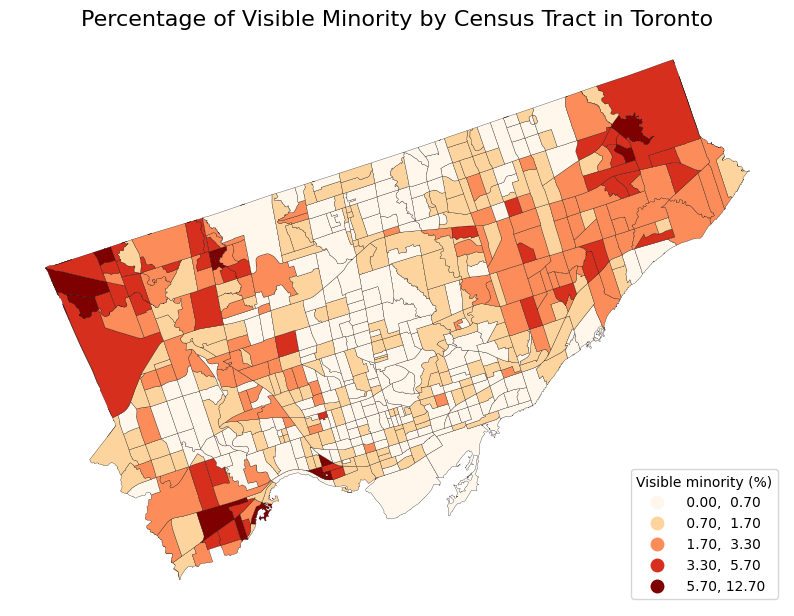

In [ ]:
to_ct = gpd.clip(vm_map_proj, toronto_proj)
to_ct.to_file('correct_toronto_ct.shp')

fig, ax = plt.subplots(figsize=(10, 10))

map = to_ct.plot(column='Percentage of visible minority', 
            scheme = 'naturalbreaks', 
            cmap='OrRd', legend=True, 
            legend_kwds = {'loc': 4, 'title': 'Visible minority (%)'}, 
            ax=ax, edgecolor='black', linewidth=0.2)
map.set_title("Percentage of Visible Minority by Census Tract in Toronto", fontsize=16)
map.set_axis_off()

In [7]:
mmhh_map = gpd.read_file('./Census tract - Median total income of households in 2020 ($)/Census tract - Median total income of households in 2020 ($).shp')
mmhh_map.rename(columns={'Value': 'Median total income of households in 2020 ($)'}, inplace=True)

In [8]:
hor_map = gpd.read_file('./Census tract - Homeownership rate (%)/Census tract - Homeownership rate (%).shp')
hor_map.rename(columns={'Value': 'Homeownership rate (%)'}, inplace=True)

In [9]:
mmhh_to = gpd.clip(mmhh_map.to_crs(epsg=2958), toronto_proj)
hor_to = gpd.clip(hor_map.to_crs(epsg=2958), toronto_proj)

vm_mmhh_ct = to_ct.merge(mmhh_to, how = 'left').iloc[:, [0,1,3,2,5,4]]
vm_hor_ct = to_ct.merge(hor_to, how = 'left').iloc[:, [0,1,3,2,5,4]]
mmhh_hor_ct = mmhh_to.merge(hor_to, how = 'left').iloc[:, [0,1,3,2,5,4]]


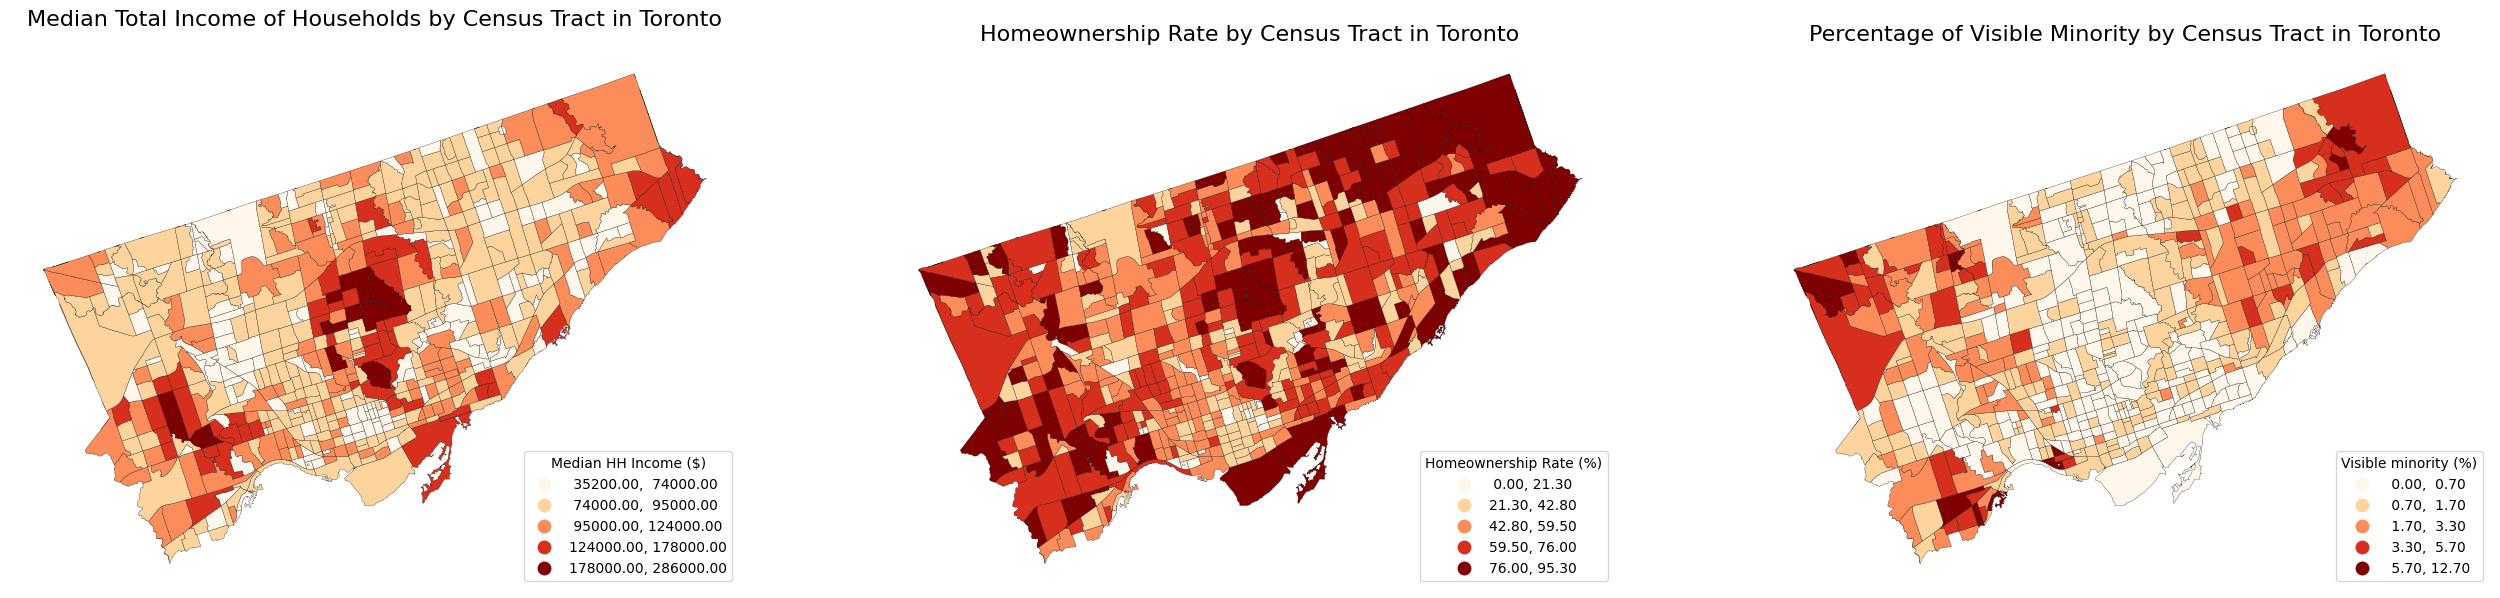

In [10]:
# do we want bivariate maps of the above gdfs ? 
# its a bit of work to set up the colour schemes but its doable
# i don't wanna start this unless we're sure to use them for the report or the presentation
# lmk by tuesday afternoon ig? im working at my intership during the day so I'll probably finish the maps later that night

fig, ax = plt.subplots(1, 3, figsize = (32, 8))

m = mmhh_to.plot(column='Median total income of households in 2020 ($)', 
            scheme = 'naturalbreaks', 
            cmap='OrRd', legend=True, 
            legend_kwds = {'loc': 4, 'title': 'Median HH Income ($)'}, 
            ax=ax[0], edgecolor='black', linewidth=0.2)
m.set_title("Median Total Income of Households by Census Tract in Toronto", fontsize=16)
m.set_axis_off()

m1 = hor_to.plot(column='Homeownership rate (%)', 
            scheme = 'naturalbreaks', 
            cmap='OrRd', legend=True, 
            legend_kwds = {'loc': 4, 'title': 'Homeownership Rate (%)'}, 
            ax=ax[1], edgecolor='black', linewidth=0.2)
m1.set_title("Homeownership Rate by Census Tract in Toronto", fontsize=16)
m1.set_axis_off()

m2 = to_ct.plot(column='Percentage of visible minority', 
            scheme = 'naturalbreaks', 
            cmap='OrRd', legend=True, 
            legend_kwds = {'loc': 4, 'title': 'Visible minority (%)'}, 
            ax=ax[2], edgecolor='black', linewidth=0.2)
m2.set_title("Percentage of Visible Minority by Census Tract in Toronto", fontsize=16)
m2.set_axis_off()

In [ ]:
import libpysal as lps

to_ct.to_crs("epsg:3857")
mmhh_to.to_crs("epsg:3857")
hor_to.to_crs("epsg:3857")

,ESRI_OID,Location,Homeownership rate (%),DGUID,geometry
860,NaN,5350500.02 [CT] (Ont.),57.6,2021S05075350500.02,"MULTIPOLYGON (((-8855212.366 5402177.869, -885..."
877,NaN,5350206.01 [CT] (Ont.),56.4,2021S05075350206.01,"POLYGON ((-8853425.505 5401974.906, -8853432.8..."
1024,NaN,5350206.02 [CT] (Ont.),45.2,2021S05075350206.02,"POLYGON ((-8852516.059 5403670.488, -8852479.7..."
1223,NaN,5350205.00 [CT] (Ont.),NaN,2021S05075350205.00,"POLYGON ((-8852009.819 5402311.507, -8852010.8..."
158,NaN,5350509.02 [CT] (Ont.),90.6,2021S05075350509.02,"MULTIPOLYGON (((-8855978.821 5403632.627, -885..."
...,...,...,...,...,...
279,NaN,5350378.25 [CT] (Ont.),87.7,2021S05075350378.25,"POLYGON ((-8820795.82 5440561.024, -8820795.74..."
94,NaN,5350378.22 [CT] (Ont.),92.5,2021S05075350378.22,"POLYGON ((-8825978.653 5438082.272, -8825989.1..."
449,NaN,5350400.14 [CT] (Ont.),82.7,2021S05075350400.14,"POLYGON ((-8822214.271 5440185.491, -8822224.8..."
486,NaN,5350400.23 [CT] (Ont.),81.3,2021S05075350400.23,"POLYGON ((-8822009.234 5440255.772, -8822080.3..."


In [14]:
# Merge `to_ct`, `mmhh_to`, and `hor_to` into a single GeoDataFrame `toronto_ct`
# Try attribute-based merge first (fast), fall back to spatial join if needed.
try:
    toronto_ct = to_ct.merge(mmhh_to, how='left').merge(hor_to, how='left')
    # If geometry got duplicated or renamed, ensure geometry column is preserved from `to_ct`
    if 'geometry_x' in toronto_ct.columns and 'geometry_y' in toronto_ct.columns:
        toronto_ct = gpd.GeoDataFrame(toronto_ct.drop(columns=['geometry_y']).rename(columns={'geometry_x':'geometry'}), geometry='geometry', crs=to_ct.crs)
    else:
        toronto_ct = gpd.GeoDataFrame(toronto_ct, geometry='geometry', crs=to_ct.crs)
    print('Attribute-merge succeeded')
except Exception as e:
    print('Attribute merge failed, using spatial join as fallback:', e)
    toronto_ct = to_ct.copy()
    # join median household income
    toronto_ct = gpd.sjoin(toronto_ct, mmhh_to[['Median total income of households in 2020 ($)']], how='left', predicate='intersects')
    toronto_ct = toronto_ct.drop(columns=['index_right'])
    # join homeownership rate
    toronto_ct = gpd.sjoin(toronto_ct, hor_to[['Homeownership rate (%)']], how='left', predicate='intersects')
    toronto_ct = toronto_ct.drop(columns=['index_right'])
    toronto_ct = gpd.GeoDataFrame(toronto_ct, geometry='geometry', crs=to_ct.crs)

# Quick checks
print('toronto_ct rows:', len(toronto_ct))
try:
    display(toronto_ct.head())
except NameError:
    print(toronto_ct.head())

toronto_ct.iloc[:, [1,3,2,5,6,4]]

Attribute-merge succeeded
toronto_ct rows: 610


,ESRI_OID,Location,Percentage of visible minority,DGUID,geometry,Median total income of households in 2020 ($),Homeownership rate (%)
0,NaN,5350500.02 [CT] (Ont.),1.3,2021S05075350500.02,"MULTIPOLYGON (((617234.911 4827336.029, 617300...",76000.0,57.6
1,NaN,5350206.01 [CT] (Ont.),1.6,2021S05075350206.01,"POLYGON ((618533.284 4827212.139, 618527.942 4...",84000.0,56.4
2,NaN,5350206.02 [CT] (Ont.),2.1,2021S05075350206.02,"POLYGON ((619171.028 4828448.999, 619199.025 4...",81000.0,45.2
3,NaN,5350205.00 [CT] (Ont.),NaN,2021S05075350205.00,"POLYGON ((619555.586 4827473.596, 619554.771 4...",NaN,NaN
4,NaN,5350509.02 [CT] (Ont.),1.2,2021S05075350509.02,"MULTIPOLYGON (((616660.811 4828377.487, 616678...",124000.0,90.6


,Location,DGUID,Percentage of visible minority,Median total income of households in 2020 ($),Homeownership rate (%),geometry
0,5350500.02 [CT] (Ont.),2021S05075350500.02,1.3,76000.0,57.6,"MULTIPOLYGON (((617234.911 4827336.029, 617300..."
1,5350206.01 [CT] (Ont.),2021S05075350206.01,1.6,84000.0,56.4,"POLYGON ((618533.284 4827212.139, 618527.942 4..."
2,5350206.02 [CT] (Ont.),2021S05075350206.02,2.1,81000.0,45.2,"POLYGON ((619171.028 4828448.999, 619199.025 4..."
3,5350205.00 [CT] (Ont.),2021S05075350205.00,NaN,NaN,NaN,"POLYGON ((619555.586 4827473.596, 619554.771 4..."
4,5350509.02 [CT] (Ont.),2021S05075350509.02,1.2,124000.0,90.6,"MULTIPOLYGON (((616660.811 4828377.487, 616678..."
...,...,...,...,...,...,...
605,5350378.25 [CT] (Ont.),2021S05075350378.25,2.3,121000.0,87.7,"POLYGON ((641604.661 4855498.287, 641604.739 4..."
606,5350378.22 [CT] (Ont.),2021S05075350378.22,0.8,93000.0,92.5,"POLYGON ((637898.741 4853635.541, 637890.59 48..."
607,5350400.14 [CT] (Ont.),2021S05075350400.14,1.8,102000.0,82.7,"POLYGON ((640586.006 4855206.288, 640578.437 4..."
608,5350400.23 [CT] (Ont.),2021S05075350400.23,1.4,112000.0,81.3,"POLYGON ((640733.014 4855260, 640682.013 48552..."


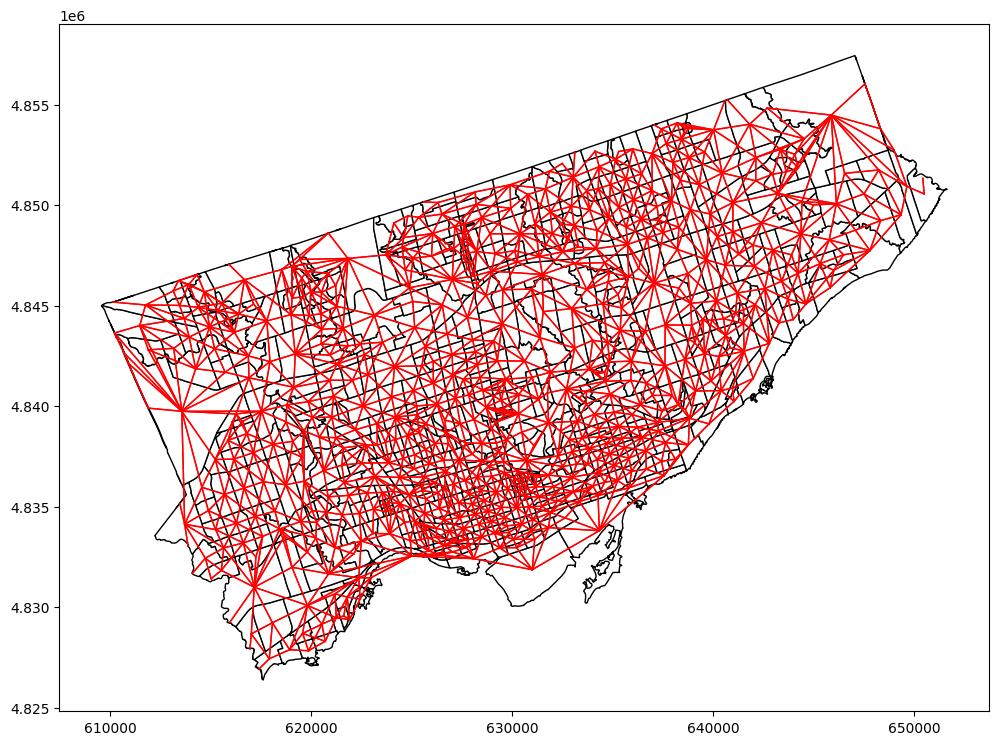

In [44]:
import esda
import splot
from splot.esda import moran_scatterplot

toronto_ct.to_crs('epsg:3857')

w = lps.weights.Queen.from_dataframe(toronto_ct, use_index=False)


fig, axes = plt.subplots(1, 1, figsize = (12, 12))
toronto_ct.plot(ax = axes, edgecolor = 'black', facecolor = 'w')
w.plot(toronto_ct, ax = axes, edge_kws = dict(color = 'r', linewidth = 1),
       node_kws = dict(marker = ''));

<Axes: >

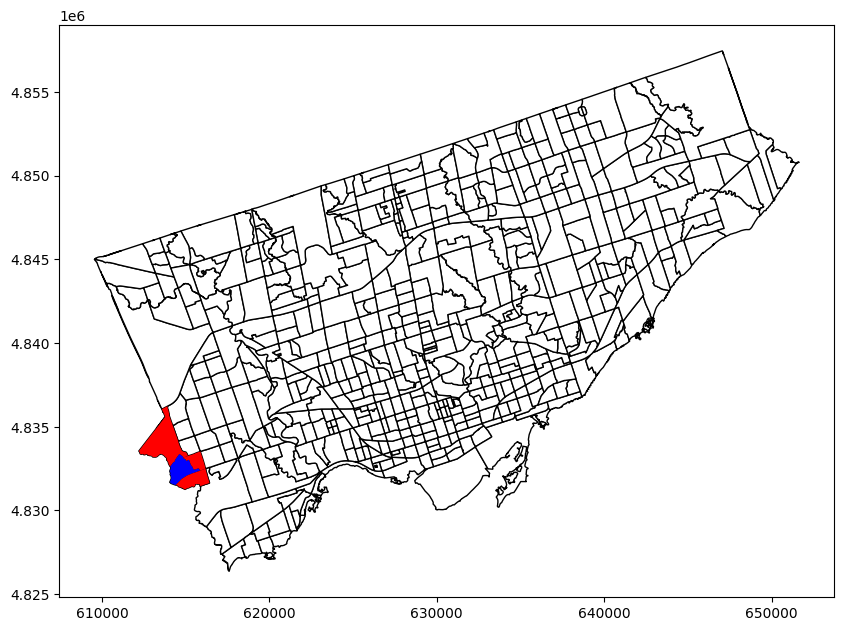

In [47]:
fpt = toronto_ct.loc[[24]]
fn = toronto_ct.loc[[80,20,22,40,27]]

fig, ax = plt.subplots(figsize=(10, 10))
toronto_ct.plot(ax = ax, edgecolor = 'black', facecolor = 'w')
fpt.plot(ax = ax, facecolor = 'b')
fn.plot(ax = ax, facecolor='r')

In [48]:
VMmoransi = esda.Moran(toronto_ct['Percentage of visible minority'], w)
MMHHmoransi = esda.Moran(toronto_ct['Median total income of households in 2020 ($)'], w)
HORmoransi = esda.Moran(toronto_ct['Homeownership rate (%)'],w)

print(f'The Morans I value for VM is {VMmoransi.I}')
print(f'The Morans I value for MMHH is {MMHHmoransi.I}')
print(f'The Morans I value for HOR is {HORmoransi.I}')

print(f'The p-value for VM is {VMmoransi.p_sim}')
print(f'The p-value for MMHH is {MMHHmoransi.p_sim}')
print(f'The p-value for HOR is {HORmoransi.p_sim}')

The Morans I value for VM is nan
The Morans I value for MMHH is nan
The Morans I value for HOR is nan
The p-value for VM is 0.001
The p-value for MMHH is 0.001
The p-value for HOR is 0.001
